In [5]:
from __future__ import division
import plotly.plotly as py
import plotly.graph_objs as go
from bubbly.bubbly import bubbleplot
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plotly
plotly.tools.set_credentials_file(username='bowenma', api_key='EDHRlihm9EJBSWW2mUCQ')

In [6]:
plotly.__version__

'3.8.1'

In [7]:
df17 = pd.read_csv('data/2017.csv')
df16 = pd.read_csv('data/2016.csv')
df15 = pd.read_csv('data/2015.csv')

In [9]:
d15 = df15[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 
            'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity',
            'Dystopia Residual']]

d16 = df16[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 
            'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity',
            'Dystopia Residual']]

# add region col for df17 since it doesn't come with it
df17['Region'] = df17.merge(df16, how='left', on='Country').Region

# rename columns to be consistent with other years
df17.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 
                'Upper Confidence Interval','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual', 'Region']
d17 = df17[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 
            'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity',
            'Dystopia Residual']]

In [10]:
df17.loc[32, 'Region'] = 'Eastern Asia'
df17.loc[70, 'Region'] = 'Eastern Asia'
df17.loc[112, 'Region'] = 'Sub-Saharan Africa'
df17.loc[138, 'Region'] = 'Sub-Saharan Africa'
df17.loc[154, 'Region'] = 'Sub-Saharan Africa'

In [5]:
df17.head()

Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
0       Norway               1            7.537                   7.594445   
1      Denmark               2            7.522                   7.581728   
2      Iceland               3            7.504                   7.622030   
3  Switzerland               4            7.494                   7.561772   
4      Finland               5            7.469                   7.527542   

   Upper Confidence Interval  Economy (GDP per Capita)    Family  \
0                   7.479556                  1.616463  1.533524   
1                   7.462272                  1.482383  1.551122   
2                   7.385970                  1.480633  1.610574   
3                   7.426227                  1.564980  1.516912   
4                   7.410458                  1.443572  1.540247   

   Health (Life Expectancy)   Freedom  Generosity  \
0                  0.796667  0.635423    0.362012   
1                  0.792566  0.626007    0.355280   
2                  0.833552  0.627163    0.475540   
3                  0.858131  0.620071    0.290549   
4                  0.809158  0.617951    0.245483   

   Trust (Government Corruption)  Dystopia Residual          Region  
0                       0.315964           2.277027  Western Europe  
1                       0.400770           2.313707  Western Europe  
2                       0.153527           2.322715  Western Europe  
3                       0.367007           2.276716  Western Europe  
4                       0.382612           2.430182  Western Europe

In [11]:
country_list = list(set(df15.Country).intersection(set(df16.Country)).intersection(set(df17.Country)))
len(country_list)

146

In [7]:
d17.head()

Country          Region  Happiness Rank  Happiness Score  \
0       Norway  Western Europe               1            7.537   
1      Denmark  Western Europe               2            7.522   
2      Iceland  Western Europe               3            7.504   
3  Switzerland  Western Europe               4            7.494   
4      Finland  Western Europe               5            7.469   

   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                       0.315964    0.362012           2.277027  
1                       0.400770    0.355280           2.313707  
2                       0.153527    0.475540           2.322715  
3                       0.367007    0.290549           2.276716  
4                       0.382612    0.245483           2.430182

In [12]:
d15['year'] = 2015
d16['year'] = 2016
d17['year'] = 2017

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [13]:
d15 = d15[d15.Country.isin(country_list)]
d16 = d16[d16.Country.isin(country_list)]
d17 = d17[d17.Country.isin(country_list)]

In [14]:
df = pd.concat([d15, d16, d17])
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  year  
0                        0.41978     0.29678            2.51738  2015  
1                        0.14145     0.43630            2.70201  2015  
2                        0.48357     0.34139            2.49204  2015  
3                        0.36503     0.34699            2.46531  2015  
4                        0.32957     0.45811            2.45176  2015

In [15]:
len(d15), len(d16), len(d17)

(146, 146, 146)

In [16]:
df['Economy (GDP per Capita)'].max(), df['Economy (GDP per Capita)'].min()

(1.8707656860351598, 0.0)

In [17]:
df.Region.value_counts()

Sub-Saharan Africa                 99
Central and Eastern Europe         87
Western Europe                     63
Latin America and Caribbean        63
Middle East and Northern Africa    57
Southeastern Asia                  24
Southern Asia                      21
Eastern Asia                       12
Australia and New Zealand           6
North America                       6
Name: Region, dtype: int64

In [18]:
df['continent'] = ''

In [19]:
df.loc[df.Region=='Central and Eastern Europe', 'continent'] = 'Europe'
df.loc[df.Region=='Western Europe', 'continent'] = 'Europe'
df.loc[df.Region=='Sub-Saharan Africa', 'continent'] = 'Africa'
df.loc[df.Region=='Latin America and Caribbean', 'continent'] = 'South America'
df.loc[df.Region=='Middle East and Northern Africa', 'continent'] = 'Africa'
df.loc[df.Region=='Southeastern Asia', 'continent'] = 'Asia'
df.loc[df.Region=='Southern Asia', 'continent'] = 'Asia'
df.loc[df.Region=='Eastern Asia', 'continent'] = 'Asia'
df.loc[df.Region=='North America', 'continent'] = 'North America'
df.loc[df.Region=='Australia and New Zealand', 'continent'] = 'Australia'

In [213]:
df.to_csv('mydf.csv', index=False)

In [17]:
df.continent.value_counts()

Africa           156
Europe           150
South America     63
Asia              57
North America      6
Australia          6
Name: continent, dtype: int64

## Plot 1

In [20]:
d = pd.read_csv('data/gapminder.tsv', delimiter='\t')

In [21]:
d.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [22]:
d.continent.value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [23]:
figure = bubbleplot(dataset=df, x_column='Economy (GDP per Capita)', y_column='Happiness Score',
                    bubble_column='Country', time_column='year', size_column='Trust (Government Corruption)', 
                    color_column='Region',
                    x_title="GDP per capita", y_title="Happiness Score", title='Happiness', 
                    scale_bubble=0.5, height=650)
figure['layout']['xaxis']['range'] = [0,2]
figure['layout']['yaxis']['range'] = [0,10]
figure['layout']['showlegend'] = True

config={'showLink': True}
iplot(figure, config=config)

## Heatmap

In [21]:
df17.head()

Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
0       Norway               1            7.537                   7.594445   
1      Denmark               2            7.522                   7.581728   
2      Iceland               3            7.504                   7.622030   
3  Switzerland               4            7.494                   7.561772   
4      Finland               5            7.469                   7.527542   

   Upper Confidence Interval  Economy (GDP per Capita)    Family  \
0                   7.479556                  1.616463  1.533524   
1                   7.462272                  1.482383  1.551122   
2                   7.385970                  1.480633  1.610574   
3                   7.426227                  1.564980  1.516912   
4                   7.410458                  1.443572  1.540247   

   Health (Life Expectancy)   Freedom  Generosity  \
0                  0.796667  0.635423    0.362012   
1                  0.792566  0.626007    0.355280   
2                  0.833552  0.627163    0.475540   
3                  0.858131  0.620071    0.290549   
4                  0.809158  0.617951    0.245483   

   Trust (Government Corruption)  Dystopia Residual          Region  
0                       0.315964           2.277027  Western Europe  
1                       0.400770           2.313707  Western Europe  
2                       0.153527           2.322715  Western Europe  
3                       0.367007           2.276716  Western Europe  
4                       0.382612           2.430182  Western Europe

[Text(0.5, 0, 'Happiness Score'),
 Text(1.5, 0, 'Economy (GDP per Capita)'),
 Text(2.5, 0, 'Family'),
 Text(3.5, 0, 'Health (Life Expectancy)'),
 Text(4.5, 0, 'Freedom'),
 Text(5.5, 0, 'Generosity'),
 Text(6.5, 0, 'Trust (Government Corruption)'),
 Text(7.5, 0, 'Dystopia Residual')]

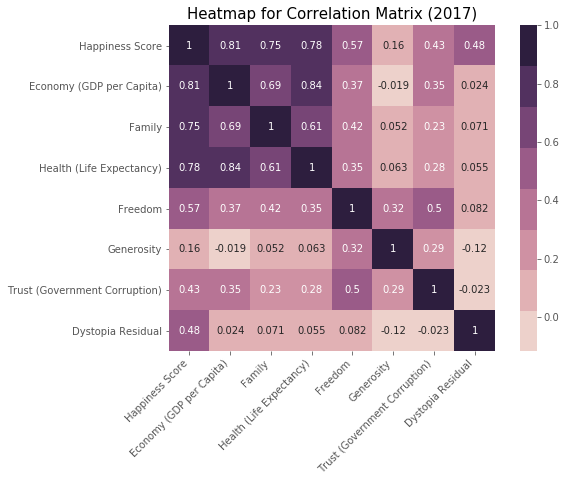

In [478]:
data = df17[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
             'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']]
cor = data.corr()

f, ax = plt.subplots(figsize=(9, 6))
# plt.subplots_adjust(top=1)
sns.heatmap(cor, annot=True, square=True, cmap=sns.cubehelix_palette(8))
plt.title('Heatmap for Correlation Matrix (2017)', y=1.3, fontsize=15)
#ax.set_title('Heatmap for Correlation Matrix 2017', y=1.5, fontsize=15)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'Happiness Score'),
 Text(1.5, 0, 'Economy (GDP per Capita)'),
 Text(2.5, 0, 'Family'),
 Text(3.5, 0, 'Health (Life Expectancy)'),
 Text(4.5, 0, 'Freedom'),
 Text(5.5, 0, 'Generosity'),
 Text(6.5, 0, 'Trust (Government Corruption)'),
 Text(7.5, 0, 'Dystopia Residual')]

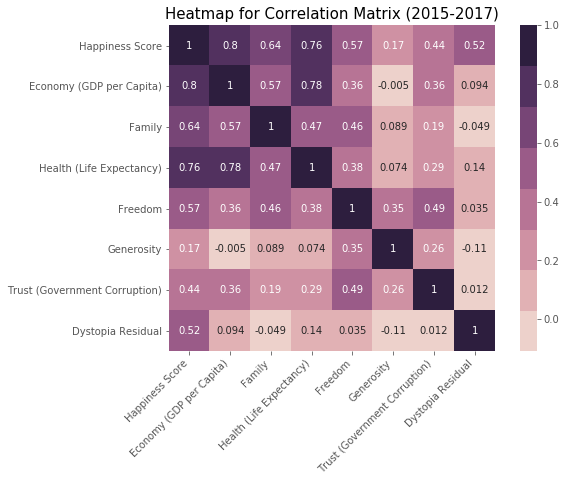

In [480]:
data = df[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
             'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']]
cor = data.corr()

f, ax = plt.subplots(figsize=(9, 6))
# plt.subplots_adjust(top=1)
sns.heatmap(cor, annot=True, square=True, cmap=sns.cubehelix_palette(8))
plt.title('Heatmap for Correlation Matrix (2015-2017)', y=1.3, fontsize=15)
#ax.set_title('Heatmap for Correlation Matrix 2017', y=1.5, fontsize=15)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## Chloropleth Map

In [495]:
data = df17

data['text'] = data['Country'] + '<br>Happiness Score '+(data['Happiness Score']).astype(str)

In [496]:
data_sorted = data.sort_values(by='Trust (Government Corruption)', ascending=False)

In [497]:
limits = [(0, 8), (9,28), (28, 66), (67, 155)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)"]

In [498]:
data.head()

Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
0       Norway               1            7.537                   7.594445   
1      Denmark               2            7.522                   7.581728   
2      Iceland               3            7.504                   7.622030   
3  Switzerland               4            7.494                   7.561772   
4      Finland               5            7.469                   7.527542   

   Upper Confidence Interval  Economy (GDP per Capita)    Family  \
0                   7.479556                  1.616463  1.533524   
1                   7.462272                  1.482383  1.551122   
2                   7.385970                  1.480633  1.610574   
3                   7.426227                  1.564980  1.516912   
4                   7.410458                  1.443572  1.540247   

   Health (Life Expectancy)   Freedom  Generosity  \
0                  0.796667  0.635423    0.362012   
1                  0.792566  0.626007    0.355280   
2                  0.833552  0.627163    0.475540   
3                  0.858131  0.620071    0.290549   
4                  0.809158  0.617951    0.245483   

   Trust (Government Corruption)  Dystopia Residual          Region  \
0                       0.315964           2.277027  Western Europe   
1                       0.400770           2.313707  Western Europe   
2                       0.153527           2.322715  Western Europe   
3                       0.367007           2.276716  Western Europe   
4                       0.382612           2.430182  Western Europe   

                                              text  
0      Norway<br>Happiness Score 7.537000179290769  
1      Denmark<br>Happiness Score 7.52199983596802  
2      Iceland<br>Happiness Score 7.50400018692017  
3  Switzerland<br>Happiness Score 7.49399995803833  
4     Finland<br>Happiness Score 7.468999862670901

In [499]:
data1 = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['Happiness Score'], 
           text = data['Country'],
           marker = go.choropleth.Marker(
                       line = go.choropleth.marker.Line(
                       color = 'black',
                       width = 0.2)),
           colorbar = {'title':'Happiness Index'},
#           colorscale = [[0, "#f7fbff"],
#                        [0.1, "#ebf3fb"], 
#                        [0.2, "#deebf7"], 
#                        [0.3, "#d2e3f3"], 
#                        [0.4, "#c6dbef"], 
#                        [0.5, "#b3d2e9"], 
#                        [0.6, "#9ecae1"],
#                        [0.7, "#85bcdb"], 
#                        [0.8, "#2171b5"], 
#                        [0.9, "#08519c"], 
#                        [1, "#08306b"]])

            colorscale = [[0.0, 'rgb(242,240,247)'],
            [0.2, 'rgb(218,218,235)'],
            [0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],
            [0.8, 'rgb(117,107,177)'],
            [1.0, 'rgb(84,39,143)']])

layout = go.Layout(
         dict(title = 'Happiness Index 2017', 
              geo = dict(showframe = False, 
                         projection = {'type': 'equirectangular'})))
#          autosize=False,
#          width=700, 
#          height=500)

choromap3 = go.Figure(data = [data1], layout=layout)

config={'showLink': True}
iplot(choromap3, config=config)

## Histogram

In [29]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  year  \
0                        0.41978     0.29678            2.51738  2015   
1                        0.14145     0.43630            2.70201  2015   
2                        0.48357     0.34139            2.49204  2015   
3                        0.36503     0.34699            2.46531  2015   
4                        0.32957     0.45811            2.45176  2015   

       continent  
0         Europe  
1         Europe  
2         Europe  
3         Europe  
4  North America

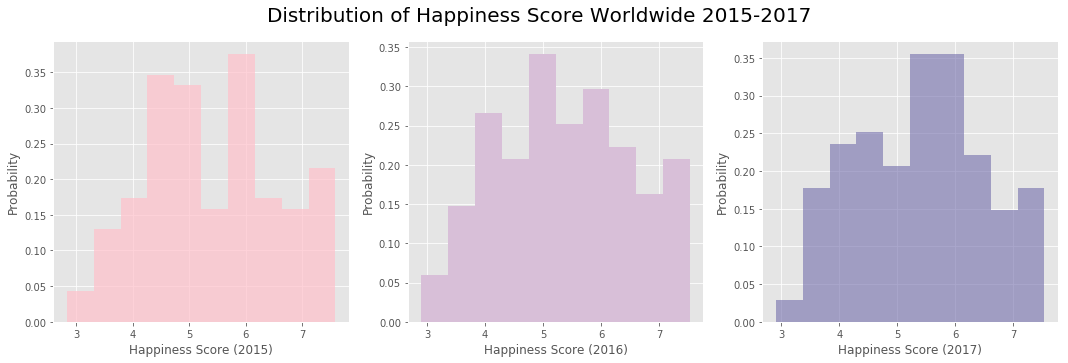

In [489]:
x15 = np.array(df[df.year==2015]['Happiness Score'])
x16 = np.array(df[df.year==2016]['Happiness Score'])
x17 = np.array(df[df.year==2017]['Happiness Score'])

plt.figure(figsize=(18, 6))
ax = plt.subplot(131)
plt.hist(x15, density=True, bins=10, color = "pink", alpha=0.7)
plt.xlabel('Happiness Score (2015)')
plt.ylabel('Probability')

plt.subplot(132)
plt.hist(x16, density=True, bins=10, color = "thistle")
plt.xlabel('Happiness Score (2016)')
plt.ylabel('Probability')

plt.subplot(133)
plt.hist(x17, density=True, bins=10, color = "#736dac", alpha=0.6)
plt.xlabel('Happiness Score (2017)')
plt.ylabel('Probability')

plt.suptitle('Distribution of Happiness Score Worldwide 2015-2017', fontsize=20)
plt.subplots_adjust(bottom=0.25, top=.9)

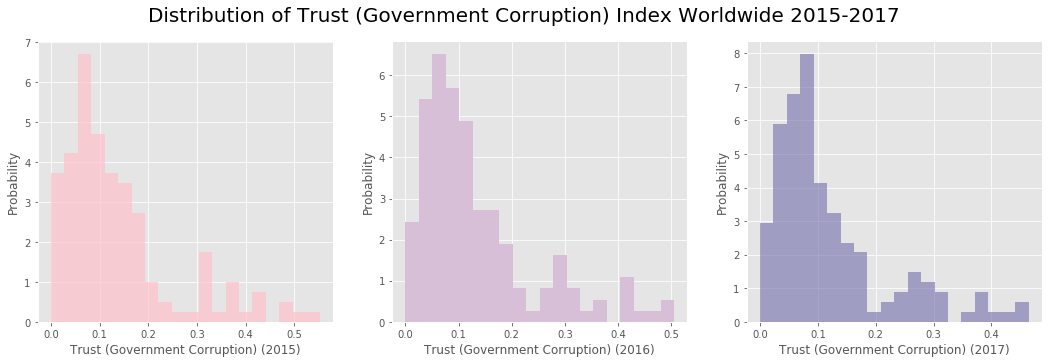

In [490]:
x15 = np.array(df[df.year==2015]['Trust (Government Corruption)'])
x16 = np.array(df[df.year==2016]['Trust (Government Corruption)'])
x17 = np.array(df[df.year==2017]['Trust (Government Corruption)'])

plt.figure(figsize=(18, 6))
ax = plt.subplot(131)
plt.hist(x15, density=True, bins=20, color = "pink", alpha=0.7)
plt.xlabel('Trust (Government Corruption) (2015)')
plt.ylabel('Probability')

plt.subplot(132)
plt.hist(x16, density=True, bins=20, color = "thistle")
plt.xlabel('Trust (Government Corruption) (2016)')
plt.ylabel('Probability')

plt.subplot(133)
plt.hist(x17, density=True, bins=20, color = "#736dac", alpha=0.6)
plt.xlabel('Trust (Government Corruption) (2017)')
plt.ylabel('Probability')

plt.suptitle('Distribution of Trust (Government Corruption) Index Worldwide 2015-2017', fontsize=20)
plt.subplots_adjust(bottom=0.25, top=.9)

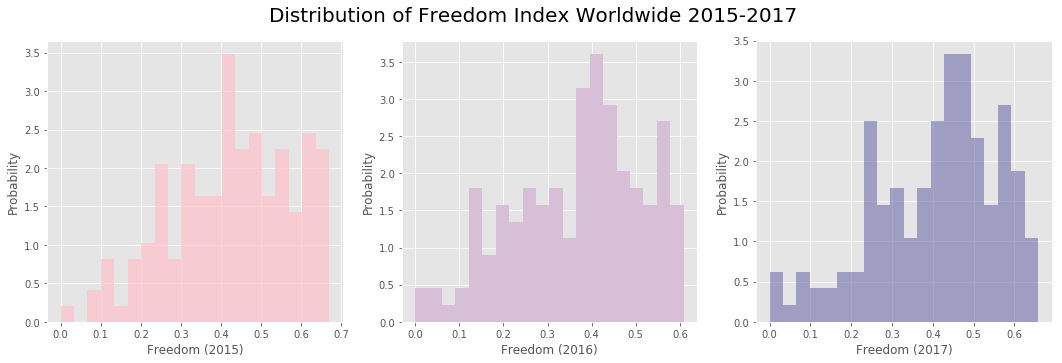

In [491]:
x15 = np.array(df[df.year==2015]['Freedom'])
x16 = np.array(df[df.year==2016]['Freedom'])
x17 = np.array(df[df.year==2017]['Freedom'])

plt.figure(figsize=(18, 6))
ax = plt.subplot(131)
plt.hist(x15, density=True, bins=20, color = "pink", alpha=0.7)
plt.xlabel('Freedom (2015)')
plt.ylabel('Probability')

plt.subplot(132)
plt.hist(x16, density=True, bins=20, color = "thistle")
plt.xlabel('Freedom (2016)')
plt.ylabel('Probability')

plt.subplot(133)
plt.hist(x17, density=True, bins=20, color = "#736dac", alpha=0.6)
plt.xlabel('Freedom (2017)')
plt.ylabel('Probability')

plt.suptitle('Distribution of Freedom Index Worldwide 2015-2017', fontsize=20)
plt.subplots_adjust(bottom=0.25, top=.9)

## Barplot

In [33]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  year  \
0                        0.41978     0.29678            2.51738  2015   
1                        0.14145     0.43630            2.70201  2015   
2                        0.48357     0.34139            2.49204  2015   
3                        0.36503     0.34699            2.46531  2015   
4                        0.32957     0.45811            2.45176  2015   

       continent  
0         Europe  
1         Europe  
2         Europe  
3         Europe  
4  North America

In [34]:
import cufflinks
cufflinks.go_offline(connected=True)

# df[df.year==2017].groupby('Region').count()['Country'].iplot(
#    kind='bar', 
#    yTitle='Happiness score', 
#    linecolor='black', 
#    title='happiness score per country')

df[df.year==2017].groupby('Region')['Happiness Score'].mean().iplot(
   kind='bar', 
   yTitle='Happiness score', 
   linecolor='black', 
   title='Average Happiness Score By Region 2017')

In [35]:
df[df.year==2015].groupby('continent')['Happiness Score'].mean().iplot(
   kind='bar', 
   yTitle='Happiness score', 
   linecolor='black', 
   title='Average Happiness Score By Continent 2017')

In [36]:
import plotly.offline as py
py.init_notebook_mode(connected=False)

# import plotly.plotly as py
# import plotly.graph_objs as go

d17 = go.Bar(x=df[df.year==2017].Region.unique(), 
             y=df[df.year==2017].groupby('Region')['Happiness Score'].mean(),
             name='2017',
             marker=dict(color='#ffcdd2'))

d16 = go.Bar(x=df[df.year==2016].Region.unique(),
             y=df[df.year==2016].groupby('Region')['Happiness Score'].mean(),
             name='2016',
             marker=dict(color='#A2D5F2'))

d15 = go.Bar(x=df[df.year==2015].Region.unique(),
             y=df[df.year==2015].groupby('Region')['Happiness Score'].mean(),
             name='2015',
             marker=dict(color='#59606D'))

data = [d15, d16, d17]
             
layout = go.Layout(title='Average Happiness Score by Region 2015-2017',
                   xaxis=dict(title='Region', tickangle=-45, automargin=True),
                   yaxis=dict(title='Happiness Score'))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='jupyter-styled_bar')

Looking at the happiness index at region level within the three years, Central and Eastern Europe has made a large jump, whereas Southeastern Asia has a significant drop.

## Boxplot

In [37]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  year  \
0                        0.41978     0.29678            2.51738  2015   
1                        0.14145     0.43630            2.70201  2015   
2                        0.48357     0.34139            2.49204  2015   
3                        0.36503     0.34699            2.46531  2015   
4                        0.32957     0.45811            2.45176  2015   

       continent  
0         Europe  
1         Europe  
2         Europe  
3         Europe  
4  North America

In [38]:
df2 = df.pivot(columns='year', values='Happiness Score')
df2.head()

year   2015   2016   2017
0     7.587  7.526  7.537
1     7.561  7.509  7.522
2     7.527  7.501  7.504
3     7.522  7.498  7.494
4     7.427  7.413  7.469

In [39]:
df2.iplot(
    kind='box',
    layout=dict(
            height=600,
            yaxis=dict(title='Happiness Score'),
            title='Box Plot of Worldwide Happiness Scores by Year',
            margin=dict(b=140)))

At first glance, it seems that there is not that much of a change during this period. Actually, the minimum score has increased from 2015 to 2016 and stays the same in 2017. Median has also increased from 2015 to 2016 and 2017. Maximum score has actually decreased from 2015 to 2016, and increased slightly in 2017. The number of people in between first quartile and third quartile seems to expand in 2016 and shrink in 2017. Seems that majority of countries are overall happier in 2017 than in 2016. 

In [40]:
df3 = df.pivot(columns='year', values='Economy (GDP per Capita)')
df3.head()
df3.iplot(
    kind='box',
    layout=dict(
            height=600,
            yaxis=dict(title='Economy (GDP per Capita)'),
            title='Box Plot of Economy (GDP per Capita) by Year',
            margin=dict(b=140)))

In [41]:
df4 = df.pivot(columns='year', values='Health (Life Expectancy)')
df4.head()
df4.iplot(
    kind='box',
    layout=dict(
            height=600,
            yaxis=dict(title='Health (Life Expectancy)'),
            title='Box Plot of Health (Life Expectancy) by Year',
            margin=dict(b=140)))

In [42]:
df5 = df.pivot(columns='year', values='Family')
df5.head()
df5.iplot(
    kind='box',
    layout=dict(
            height=600,
            yaxis=dict(title='Family Index'),
            title='Box Plot of Family Index by Year',
            margin=dict(b=140)))

In [43]:
df6 = df.pivot(columns='year', values='Freedom')
df6.head()
df6.iplot(
    kind='box',
    layout=dict(
            height=600,
            yaxis=dict(title='Freedom Index'),
            title='Box Plot of Freedom Index by Year',
            margin=dict(b=140)))

In [44]:
df7 = df.pivot(columns='year', values='Generosity')
df7.head()
df7.iplot(
    kind='box',
    layout=dict(
            height=600,
            yaxis=dict(title='Generosity Index'),
            title='Box Plot of Generosity Index by Year',
            margin=dict(b=140)))

In [45]:
df8 = df.pivot(columns='year', values='Trust (Government Corruption)')
df8.head()
df8.iplot(
    kind='box',
    layout=dict(
            height=600,
            yaxis=dict(title='Trust (Government Corruption) Index'),
            title='Box Plot of Trust (Government Corruption) Index by Year',
            margin=dict(b=140)))

Surprisingly, box plot of Trust (Government Corruption) demonstrates a very different pattern from those of other indicators. It seems that people's trust in government has been decreasing as time goes regardless of any other factors.

## Scatterplot

In [46]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  year  \
0                        0.41978     0.29678            2.51738  2015   
1                        0.14145     0.43630            2.70201  2015   
2                        0.48357     0.34139            2.49204  2015   
3                        0.36503     0.34699            2.46531  2015   
4                        0.32957     0.45811            2.45176  2015   

       continent  
0         Europe  
1         Europe  
2         Europe  
3         Europe  
4  North America

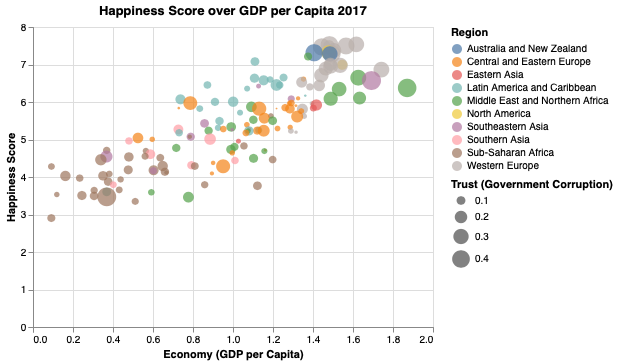

In [487]:
import altair as alt
#from vega_datasets import data
from altair.expr import datum
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

alt.Chart(df[df.year==2017]).mark_circle(size=500).encode(
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    color='Region',
    size='Trust (Government Corruption)'
).properties(title='Happiness Score over GDP per Capita 2017'
).interactive()

## Bubble Map

In [ ]:
df['text'] = df['Country'] + '<br>Happiness Score '+(df['Happiness Score']).astype(str)

In [334]:
df['text'] = df['Country'] + '<br>Happiness Score '+(df['Happiness Score']).astype(str)+\
             '<br>Economy (GDP per Capita)'+(df['Economy (GDP per Capita)']).astype(str)

In [335]:
df15_sorted = df[df.year==2015].sort_values(by='Trust (Government Corruption)', ascending=False)
df16_sorted = df[df.year==2016].sort_values(by='Trust (Government Corruption)', ascending=False)
df17_sorted = df[df.year==2017].sort_values(by='Trust (Government Corruption)', ascending=False)

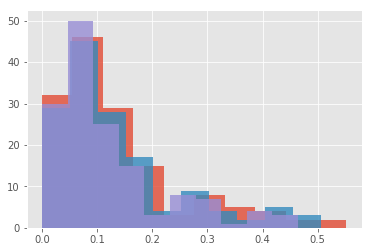

In [336]:
df15_sorted['Trust (Government Corruption)'].hist(alpha=0.8)
df16_sorted['Trust (Government Corruption)'].hist(alpha=0.8)
df17_sorted['Trust (Government Corruption)'].hist(alpha=0.8)

In [337]:
# add lat and long to datasets
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application", timeout=3)
latitude = []
long = []
for i in df15_sorted["Country"]:
    location = geolocator.geocode(i)
    latitude.append(location.latitude)#, location.longitude)
    long.append(location.longitude)

In [338]:
df15_sorted['lat'] = latitude
df15_sorted['lon'] = long

In [339]:
df15_sorted.head()

Country                           Region  Happiness Rank  \
153     Rwanda               Sub-Saharan Africa             154   
27       Qatar  Middle East and Northern Africa              28   
23   Singapore                Southeastern Asia              24   
2      Denmark                   Western Europe               3   
7       Sweden                   Western Europe               8   

     Happiness Score  Economy (GDP per Capita)   Family  \
153            3.465                   0.22208  0.77370   
27             6.611                   1.69042  1.07860   
23             6.798                   1.52186  1.02000   
2              7.527                   1.32548  1.36058   
7              7.364                   1.33171  1.28907   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
27                    0.79733  0.64040                        0.52208   
23                    1.02525  0.54252                        0.49210   
2                     0.87464  0.64938                        0.48357   
7                     0.91087  0.65980                        0.43844   

     Generosity  Dystopia Residual  year continent  \
153     0.22628            0.67042  2015    Africa   
27      0.32573            1.55674  2015    Africa   
23      0.31105            1.88501  2015      Asia   
2       0.34139            2.49204  2015    Europe   
7       0.36262            2.37119  2015    Europe   

                                                  text        lat         lon  
153  Rwanda<br>Happiness Score 3.465<br>Economy (GD...  -1.964663   30.064436  
27   Qatar<br>Happiness Score 6.611000000000001<br>...  25.333698   51.229529  
23   Singapore<br>Happiness Score 6.797999999999999...   1.340853  103.878447  
2    Denmark<br>Happiness Score 7.527<br>Economy (G...  55.670249   10.333328  
7    Sweden<br>Happiness Score 7.364<br>Economy (GD...  59.674971   14.520858

In [340]:
# correction for api error
df15_sorted.loc[df15_sorted.Country=='Georgia', 'lat'] = 42.3154
df15_sorted.loc[df15_sorted.Country=='Georgia', 'lon'] = 43.3569

In [341]:
limits = [(0,2), (3, 10), (11, 20), (21, 50), (50, 146)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
countries = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    sf_sub = df15_sorted[lim[0]:lim[1]]
    country = go.Scattergeo(
        locations = df15_sorted['Country'],
        locationmode = 'country names',
        text = df15_sorted['text'],
        marker = go.scattergeo.Marker(
            size = df15_sorted['Trust (Government Corruption)']*1000,
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'   
            ),
            sizemode='area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]))
    countries.append(country)

layout = go.Layout(
        title = go.layout.Title(
            text = '2014 US city populations<br>(Click legend to toggle traces)'
        ),
        showlegend = True,
        geo = go.layout.Geo(
            scope = 'world',
            projection = go.layout.geo.Projection(
                type='equirectangular'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=countries, layout=layout)
py.iplot(fig, filename='d3-bubble-map-happiness')

In [342]:
import folium

# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0, len(df15_sorted[df15_sorted.Region=='Sub-Saharan Africa'])):
   folium.Circle(
      #location=df[df.year==2015].iloc[i]['Country'],
      location=[df15_sorted[df15_sorted.Region=='Sub-Saharan Africa'].iloc[i]['lat'], df15_sorted[df15_sorted.Region=='Sub-Saharan Africa'].iloc[i]['lon']],
      popup=df15_sorted[df15_sorted.Region=='Sub-Saharan Africa'].iloc[i]['Country'],
      radius=df15_sorted[df15_sorted.Region=='Sub-Saharan Africa'].iloc[i]['Economy (GDP per Capita)']*200000,
      color='crimson',
      fill=True,
      fill_color='crimson'
).add_to(m)
 
display(m)

In [103]:
df15_sorted.to_csv('sorted.csv', index=False)

In [216]:
df15_sorted.head()

Country                           Region  Happiness Rank  \
153     Rwanda               Sub-Saharan Africa             154   
27       Qatar  Middle East and Northern Africa              28   
23   Singapore                Southeastern Asia              24   
2      Denmark                   Western Europe               3   
7       Sweden                   Western Europe               8   

     Happiness Score  Economy (GDP per Capita)   Family  \
153            3.465                   0.22208  0.77370   
27             6.611                   1.69042  1.07860   
23             6.798                   1.52186  1.02000   
2              7.527                   1.32548  1.36058   
7              7.364                   1.33171  1.28907   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
27                    0.79733  0.64040                        0.52208   
23                    1.02525  0.54252                        0.49210   
2                     0.87464  0.64938                        0.48357   
7                     0.91087  0.65980                        0.43844   

     Generosity  Dystopia Residual  year continent  \
153     0.22628            0.67042  2015    Africa   
27      0.32573            1.55674  2015    Africa   
23      0.31105            1.88501  2015      Asia   
2       0.34139            2.49204  2015    Europe   
7       0.36262            2.37119  2015    Europe   

                                               text        lat         lon  
153                 Rwanda<br>Happiness Score 3.465  -1.964663   30.064436  
27       Qatar<br>Happiness Score 6.611000000000001  25.333698   51.229529  
23   Singapore<br>Happiness Score 6.797999999999999   1.340853  103.878447  
2                  Denmark<br>Happiness Score 7.527  55.670249   10.333328  
7                   Sweden<br>Happiness Score 7.364  59.674971   14.520858

Text(0.5, 1.0, 'Bubble Map of World Trust (Government Corruption) Index 2015')

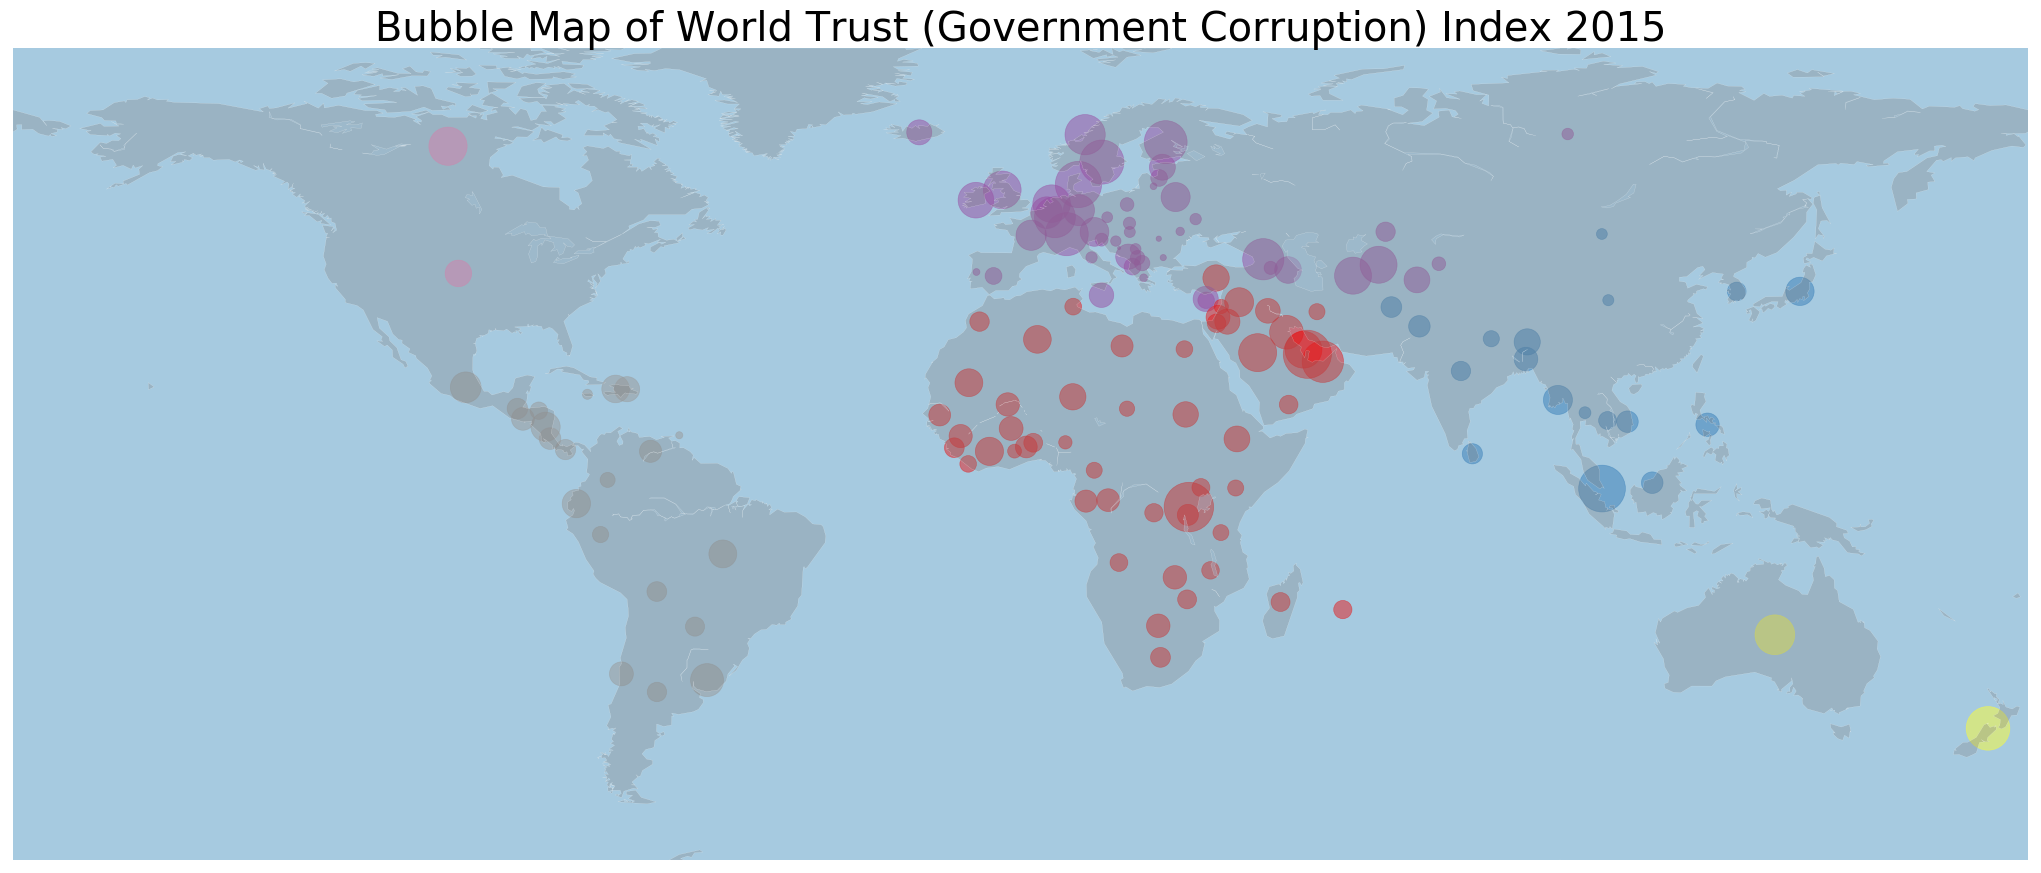

In [492]:
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
df15_sorted['labels_enc'] = pd.factorize(df15_sorted['continent'])[0]
 
# # Add a point per position
m.scatter(df15_sorted['lon'], df15_sorted['lat'], 
          s=df15_sorted['Trust (Government Corruption)']*2500, 
          alpha=0.5, c=df15_sorted['labels_enc'], cmap="Set1")
 

# sizes = [50*(i+1.) for i in range(4)]
# labels = ['Tiny', 'Small', 'Medium', 'Large', 'Huge']

# plt.legend(handles=markers) 
plt.title('Bubble Map of World Trust (Government Corruption) Index 2015', size=30)

Text(0.5, 1.0, 'Bubble Map of World Economy (GDP per Capita) 2015')

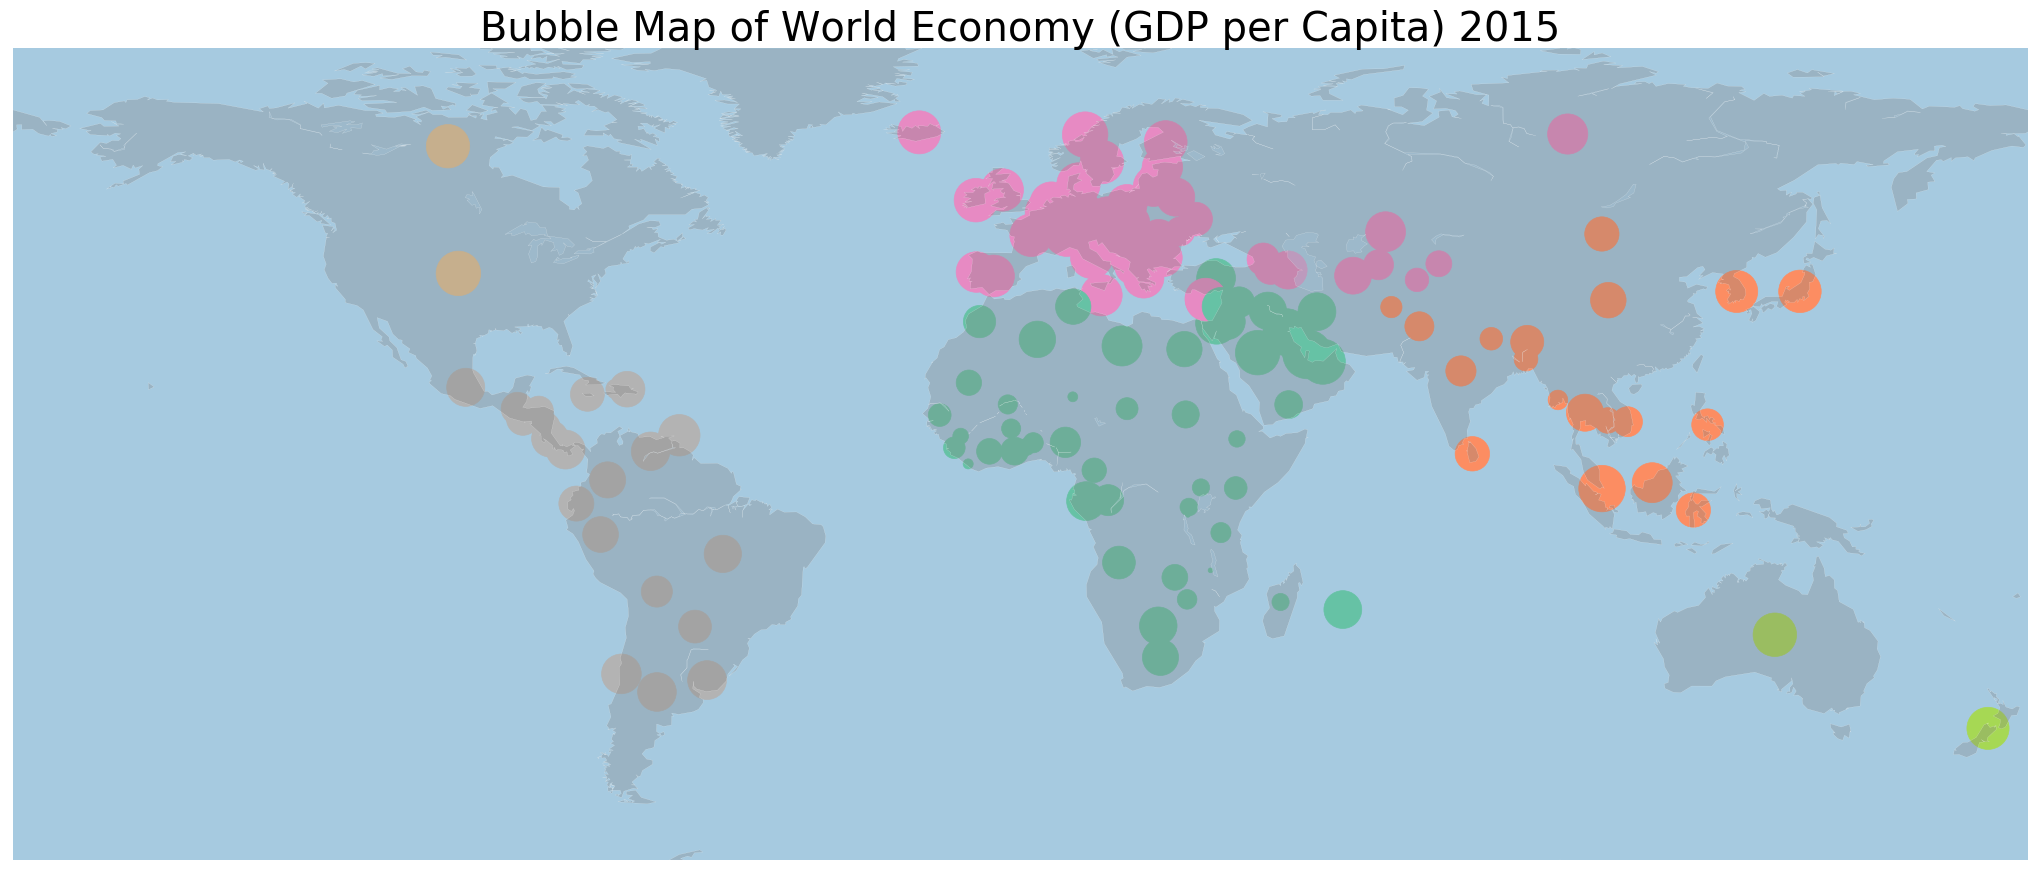

In [493]:
from mpl_toolkits.basemap import Basemap

# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
df15_sorted['labels_enc'] = pd.factorize(df15_sorted['continent'])[0]
 
# # Add a point per position
m.scatter(df15_sorted['lon'], df15_sorted['lat'], 
          s=df15_sorted['Economy (GDP per Capita)']*800, 
          alpha=1.2, c=df15_sorted['labels_enc'], cmap="Set2")
 

# sizes = [50*(i+1.) for i in range(4)]
# labels = ['Tiny', 'Small', 'Medium', 'Large', 'Huge']

# plt.legend(handles=markers) 
plt.title('Bubble Map of World Economy (GDP per Capita) 2015', size=30)

## Connection Map

In [345]:
continent_gdp = df15_sorted.groupby(['continent'], as_index=False).agg({'Economy (GDP per Capita)': max})

In [346]:
continent_gdp

continent  Economy (GDP per Capita)
0         Africa                   1.69042
1           Asia                   1.52186
2      Australia                   1.33358
3         Europe                   1.56391
4  North America                   1.39451
5  South America                   1.21183

In [352]:
continent_gdp = continent_gdp.merge(df15_sorted, on=['continent', 'Economy (GDP per Capita)'], how='left')

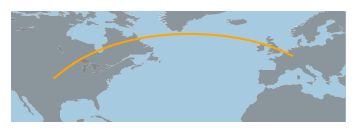

In [348]:
m=Basemap(llcrnrlon=-120, llcrnrlat=20,urcrnrlon=30,urcrnrlat=70)

m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a connection between United States and Luxembourg
startlat = 39.783730; startlon = -100.445882
arrlat = 49.815868; arrlon = 6.129675
m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=2, color='orange')


In [373]:
continent_gdp.to_csv('continent_gdp.csv', index=False)

In [378]:
continent_data = pd.read_csv('data/continent_gdp_bm.csv')

In [500]:
countries = [go.Scattergeo(
    #locationmode = 'country names',
    lon = continent_data['start_lon'],
    lat = continent_data['start_lat'],
    hoverinfo = 'text',
    text = continent_data['Country'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 10,
        color = 'rgb(255, 0, 0)',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

trading_paths = []
for i in range(len(continent_gdp)):
    trading_paths.append(
        go.Scattergeo(
            lon = [continent_data['start_lon'][i], continent_data['end_lon'][i]],
            lat = [continent_data['start_lat'][i], continent_data['end_lat'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'red',
            ),
            opacity = float(continent_gdp['Economy (GDP per Capita)'][i]) / float(continent_gdp['Economy (GDP per Capita)'].max()),
        )
    )

layout = go.Layout(
    title = go.layout.Title(
        text = 'Trading Paths among Top GDP Countries in Each Continent 2015<br>(Hover for country names)'
    ),
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'world',
        projection = go.layout.geo.Projection(type = 'equirectangular'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = trading_paths + countries, layout = layout)
py.iplot(fig, filename = 'd3-trading-paths')

## Stacked area or stream graph

In [ ]:
alt.renderers.enable('notebook')

alt.Chart(df[df.year==2017]).mark_circle().encode(
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    color='Region',
    size='Trust (Government Corruption)'
).properties(title='Happiness Score over GDP per Capita 2017'
).interactive()

In [400]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  year  \
0                        0.41978     0.29678            2.51738  2015   
1                        0.14145     0.43630            2.70201  2015   
2                        0.48357     0.34139            2.49204  2015   
3                        0.36503     0.34699            2.46531  2015   
4                        0.32957     0.45811            2.45176  2015   

       continent                                               text  
0         Europe  Switzerland<br>Happiness Score 7.5870000000000...  
1         Europe  Iceland<br>Happiness Score 7.561<br>Economy (G...  
2         Europe  Denmark<br>Happiness Score 7.527<br>Economy (G...  
3         Europe  Norway<br>Happiness Score 7.522<br>Economy (GD...  
4  North America  Canada<br>Happiness Score 7.4270000000000005<b...

In [419]:
df['date'] = pd.to_datetime(df.year, format='%Y')

In [425]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  year  \
0                        0.41978     0.29678            2.51738  2015   
1                        0.14145     0.43630            2.70201  2015   
2                        0.48357     0.34139            2.49204  2015   
3                        0.36503     0.34699            2.46531  2015   
4                        0.32957     0.45811            2.45176  2015   

       continent                                               text       date  
0         Europe  Switzerland<br>Happiness Score 7.5870000000000... 2015-01-01  
1         Europe  Iceland<br>Happiness Score 7.561<br>Economy (G... 2015-01-01  
2         Europe  Denmark<br>Happiness Score 7.527<br>Economy (G... 2015-01-01  
3         Europe  Norway<br>Happiness Score 7.522<br>Economy (GD... 2015-01-01  
4  North America  Canada<br>Happiness Score 7.4270000000000005<b... 2015-01-01

In [435]:
df.date.unique()

array(['2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

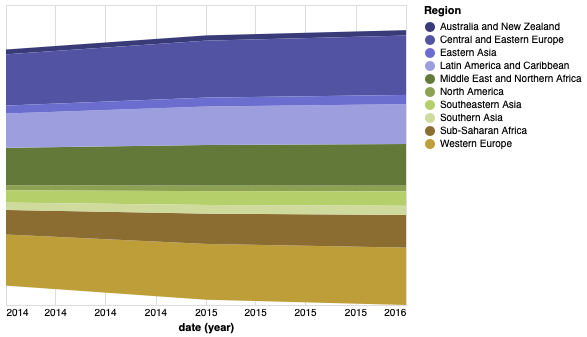

In [460]:
alt.Chart(df).mark_area().encode(
    alt.X('year(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(Economy (GDP per Capita)):Q', stack='center', axis=None),
    alt.Color('Region:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

In [445]:
d = pd.read_csv('data/gapminder.tsv', delimiter='\t')

In [446]:
d.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [458]:
d['date'] = pd.to_datetime(d.year, format='%Y')

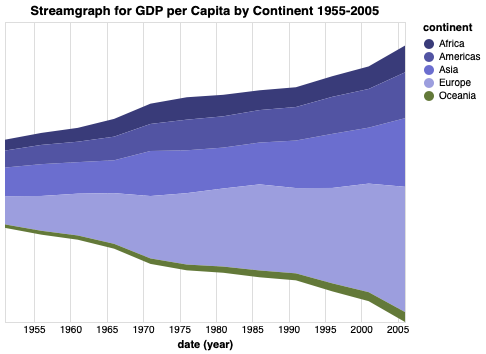

In [477]:
alt.Chart(d).mark_area().encode(
    alt.X('year(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(gdpPercap):Q', stack='center', axis=None),
    alt.Color('continent:N',
        scale=alt.Scale(scheme='category20b')
    )
).properties(title='Streamgraph for GDP per Capita by Continent 1955-2005'
).interactive()

## Treemapping

In [472]:
df.to_csv('mydf.csv', index=False)

In [476]:
df['Health (Life Expectancy)'].min(), df['Health (Life Expectancy)'].max()

(0.0, 1.02525)

Treemapping made in Tableau. https://public.tableau.com/profile/bowen.ma#!/vizhome/final_project_treemap/treemap2
